# Data Mining Group Project
Paul Walker, Anthony Deriso, Alex Pitts


In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
from dmba import adjusted_r2_score, AIC_score, BIC_score

## Data Import

In [4]:
housing = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')
housing

/var/folders/kc/57yvxbt94_14fp47908s7l_40000gn/T/ipykernel_9818/653648376.py:1: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  housing = pd.read_csv('Real_Estate_Sales_2001-2022_GL.csv')


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097624,2200073,2022,10/11/2022,Stamford,193 SADDLE HILL ROAD,483380.0,865000.0,0.5588,Residential,Single Family,NaN,NaN,NaN,POINT (-73.577612999 41.148977983)
1097625,220369,2022,09/29/2023,Wethersfield,37 LUCA LN,20650.0,760857.0,0.0271,Residential,Single Family,07 - Change in Property,NEW CONSTRUCTION - NOT COMPLETE FOR 10/1/2022,NaN,POINT (-72.663607 41.712487)
1097626,2200470,2022,01/09/2023,Stamford,1096 EAST MAIN STREET #16-D-1,132900.0,220000.0,0.6040,Residential,Condo,NaN,NaN,NaN,POINT (-73.515726977 41.057837988)
1097627,22396,2022,09/26/2023,Old Saybrook,115 SHEFFIELD ST,1099400.0,1575000.0,0.6980,Residential,Single Family,NaN,NaN,NaN,POINT (-72.368005967 41.289124997)


## Data Preparation

In [5]:
## Replace spaces with underscores in column titles
housing.columns = housing.columns.str.replace(' ', '_')
housing.head()

,Serial_Number,List_Year,Date_Recorded,Town,Address,Assessed_Value,Sale_Amount,Sales_Ratio,Property_Type,Residential_Type,Non_Use_Code,Assessor_Remarks,OPM_remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,200500,2020,09/07/2021,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,NaN,NaN,NaN,NaN


In [6]:
## Setting index as Serial Number
housing.set_index('Serial_Number', inplace=True)

In [7]:
## Dropping columns not used as predictors
housing.drop(columns=['Town', 'Address', 'Sales_Ratio', 'Non_Use_Code', 'Assessor_Remarks', 'OPM_remarks', 'Location'], inplace=True)
housing.head()

,List_Year,Date_Recorded,Assessed_Value,Sale_Amount,Property_Type,Residential_Type
Serial_Number,,,,,,
2020177,2020,04/14/2021,133000.0,248400.0,Residential,Single Family
2020225,2020,05/26/2021,110500.0,239900.0,Residential,Three Family
2020348,2020,09/13/2021,150500.0,325000.0,Commercial,NaN
2020090,2020,12/14/2020,127400.0,202500.0,Residential,Two Family
200500,2020,09/07/2021,217640.0,400000.0,Residential,Single Family


In [8]:
## Drop rows with missing values
housing = housing.dropna()

In [9]:
housing = housing[housing['Assessed_Value']< 2000000]
housing = housing[housing['Sale_Amount']< 2000000]

In [10]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 686610 entries, 2020177 to 220890
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   List_Year         686610 non-null  int64  
 1   Date_Recorded     686610 non-null  object 
 2   Assessed_Value    686610 non-null  float64
 3   Sale_Amount       686610 non-null  float64
 4   Property_Type     686610 non-null  object 
 5   Residential_Type  686610 non-null  object 
dtypes: float64(2), int64(1), object(3)
memory usage: 36.7+ MB


In [11]:
## Change Date_Recorded to just the month
housing['Date_Recorded'] = pd.to_datetime(housing['Date_Recorded'])
housing['Date_Recorded'] = housing['Date_Recorded'].dt.month
housing.head()

,List_Year,Date_Recorded,Assessed_Value,Sale_Amount,Property_Type,Residential_Type
Serial_Number,,,,,,
2020177,2020,4,133000.0,248400.0,Residential,Single Family
2020225,2020,5,110500.0,239900.0,Residential,Three Family
2020090,2020,12,127400.0,202500.0,Residential,Two Family
200500,2020,9,217640.0,400000.0,Residential,Single Family
200121,2020,12,528490.0,775000.0,Residential,Single Family


In [12]:
housing.columns

Index(['List_Year', 'Date_Recorded', 'Assessed_Value', 'Sale_Amount',
       'Property_Type', 'Residential_Type'],
      dtype='object')

In [13]:
## Get Dummy variables for Property_Type and Residential_Type
housing = pd.get_dummies(housing, columns=['Property_Type', 'Residential_Type'], drop_first=True)
housing.head()


,List_Year,Date_Recorded,Assessed_Value,Sale_Amount,Property_Type_Four Family,Property_Type_Residential,Property_Type_Single Family,Property_Type_Three Family,Property_Type_Two Family,Residential_Type_Four Family,Residential_Type_Single Family,Residential_Type_Three Family,Residential_Type_Two Family
Serial_Number,,,,,,,,,,,,,
2020177,2020,4,133000.0,248400.0,False,True,False,False,False,False,True,False,False
2020225,2020,5,110500.0,239900.0,False,True,False,False,False,False,False,True,False
2020090,2020,12,127400.0,202500.0,False,True,False,False,False,False,False,False,True
200500,2020,9,217640.0,400000.0,False,True,False,False,False,False,True,False,False
200121,2020,12,528490.0,775000.0,False,True,False,False,False,False,True,False,False


In [14]:
print(housing.columns)

Index(['List_Year', 'Date_Recorded', 'Assessed_Value', 'Sale_Amount',
       'Property_Type_Four Family', 'Property_Type_Residential',
       'Property_Type_Single Family', 'Property_Type_Three Family',
       'Property_Type_Two Family', 'Residential_Type_Four Family',
       'Residential_Type_Single Family', 'Residential_Type_Three Family',
       'Residential_Type_Two Family'],
      dtype='object')


In [15]:
## Make dummy variables int instead of bool
housing = housing.astype({'Property_Type_Four Family': 'int', 
                           'Property_Type_Residential': 'int', 
                           'Property_Type_Single Family': 'int',
                           'Property_Type_Three Family': 'int',
                           'Property_Type_Two Family': 'int',
                           'Residential_Type_Four Family': 'int',
                           'Residential_Type_Single Family': 'int',
                           'Residential_Type_Three Family': 'int',
                           'Residential_Type_Two Family': 'int'})
housing.head()

,List_Year,Date_Recorded,Assessed_Value,Sale_Amount,Property_Type_Four Family,Property_Type_Residential,Property_Type_Single Family,Property_Type_Three Family,Property_Type_Two Family,Residential_Type_Four Family,Residential_Type_Single Family,Residential_Type_Three Family,Residential_Type_Two Family
Serial_Number,,,,,,,,,,,,,
2020177,2020,4,133000.0,248400.0,0,1,0,0,0,0,1,0,0
2020225,2020,5,110500.0,239900.0,0,1,0,0,0,0,0,1,0
2020090,2020,12,127400.0,202500.0,0,1,0,0,0,0,0,0,1
200500,2020,9,217640.0,400000.0,0,1,0,0,0,0,1,0,0
200121,2020,12,528490.0,775000.0,0,1,0,0,0,0,1,0,0


In [16]:
## Predictors and Outcome
predictors = ['Date_Recorded', 'Assessed_Value', 'Property_Type_Four Family',
       'Property_Type_Residential', 'Property_Type_Single Family',
       'Property_Type_Three Family', 'Property_Type_Two Family','Residential_Type_Four Family',
       'Residential_Type_Three Family', 'Residential_Type_Two Family']
outcome  = 'Sale_Amount'

In [17]:
## Partition data
X = housing[predictors]
y = housing[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=1)

## Multiple Linear Regression Model

In [18]:
## Running MLR
from sklearn.linear_model import LinearRegression
housing_lm = LinearRegression()
housing_lm.fit(train_X, train_y)

LinearRegression()

In [19]:
## Coefficients
print('Intercept: ', housing_lm.intercept_)
print(pd.DataFrame({'Predictor ': X.columns, 'coefficient': housing_lm.coef_}))

Intercept:  31461.64037283807
                      Predictor    coefficient
0                  Date_Recorded    367.908015
1                 Assessed_Value      1.299995
2      Property_Type_Four Family -51068.697955
3      Property_Type_Residential  83054.499292
4    Property_Type_Single Family -11891.987012
5     Property_Type_Three Family -39077.666643
6       Property_Type_Two Family -14012.105663
7   Residential_Type_Four Family  13335.326289
8  Residential_Type_Three Family   5122.332093
9    Residential_Type_Two Family -22969.010392


In [20]:
## Performance results
from dmba import regressionSummary, exhaustive_search
regressionSummary(train_y, housing_lm.predict(train_X))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 128334.3076
     Mean Absolute Error (MAE) : 73289.0579


In [38]:
housing_lm_pred = housing_lm.predict(valid_X)
pred_y = housing_lm.predict(train_X)
result = pd.DataFrame({'Predicted': housing_lm_pred, 'Actual': valid_y,
                       'Residual': valid_y - housing_lm_pred})
print(result.head(20))
regressionSummary(valid_y, housing_lm_pred)
print('adjusted r2 : ', adjusted_r2_score(train_y, pred_y, housing_lm))

                   Predicted    Actual       Residual
Serial_Number                                        
190416         220558.123930  275000.0   54441.876070
130298         121526.685974  106945.0  -14581.685974
11153          485515.364938  440000.0  -45515.364938
19381          390259.521649  439000.0   48740.478351
140459         162895.509936   57500.0 -105395.509936
170137         197608.024024  209900.0   12291.975976
90262          162950.147027  105000.0  -57950.147027
10255          219850.518374  200000.0  -19850.518374
15193          207740.169422  272200.0   64459.830578
140309         188356.084412  100000.0  -88356.084412
210079         317688.602483  174000.0 -143688.602483
131629         251108.015507  250000.0   -1108.015507
175772         129698.809111   95000.0  -34698.809111
80641          169504.177717  217800.0   48295.822283
150286         169270.668668  159000.0  -10270.668668
70712          174482.378135  165800.0   -8682.378135
20014          387172.083845

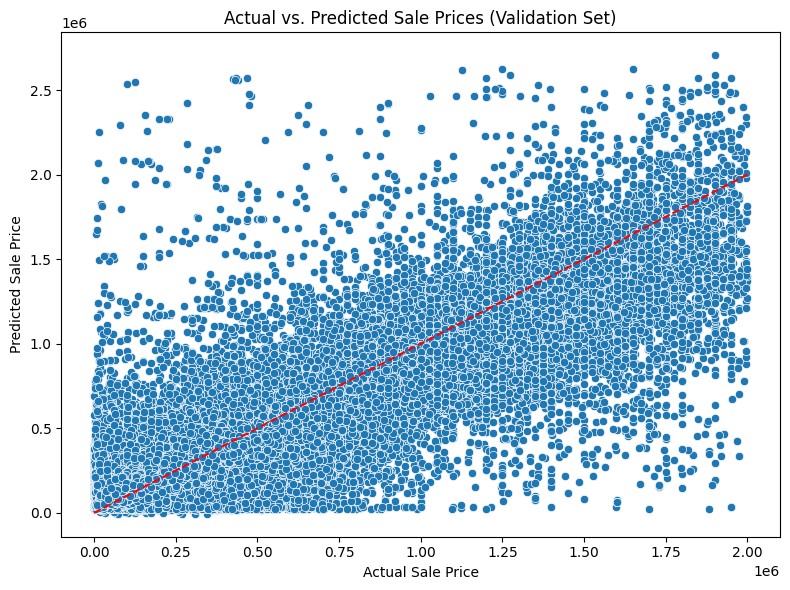

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=valid_y, y=housing_lm_pred)

plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'r--')
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Prices (Validation Set)")
plt.tight_layout()
plt.show()

#### This plot shows how well our model’s predicted sale prices match actual prices on the validation set. While there is a strong upward trend indicating general accuracy, the spread increases with higher values. This suggests that our model underpredicts for higher-value homes.

## Tree Model

In [23]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

In [24]:
param_grid = {
    'max_depth': [5, 10, 15, 20, 25], 
    'min_impurity_decrease': [0, 0.001, 0.005, 0.01], 
    'min_samples_split': [10, 20, 30, 40, 50], }

In [25]:
gridSearch = GridSearchCV(tree.DecisionTreeRegressor(), param_grid, cv=5, n_jobs=1)
gridSearch.fit(train_X, train_y)
print('Initial parameters: ', gridSearch.best_params_)

Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 50}


In [26]:
new_param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 
    'min_impurity_decrease': [0, 0.001, 0.002, 0.003, 0.005, 0.006, 0.007, 0.008], 
    'min_samples_split': [14, 15, 16, 18, 20], 
}

In [27]:
gridSearch = GridSearchCV(tree.DecisionTreeRegressor(), new_param_grid, cv=5, n_jobs=1)
gridSearch.fit(train_X, train_y)
print('Improved parameters: ', gridSearch.best_params_)

regTree = gridSearch.best_estimator_

Improved parameters:  {'max_depth': 9, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [28]:
regressionSummary(train_y, regTree.predict(train_X))
regressionSummary(valid_y, regTree.predict(valid_X))


Regression statistics

               Mean Error (ME) : -0.0000
Root Mean Squared Error (RMSE) : 117319.5022
     Mean Absolute Error (MAE) : 68962.2730

Regression statistics

               Mean Error (ME) : 5.8288
Root Mean Squared Error (RMSE) : 120388.4475
     Mean Absolute Error (MAE) : 69791.6236


In [29]:
regTree_pred = regTree.predict(valid_X)
pred_y = regTree.predict(train_X)
result = pd.DataFrame({'Predicted': regTree_pred, 'Actual': valid_y,
                       'Residual': valid_y - regTree_pred})
print(result.head(20))
regressionSummary(valid_y, regTree_pred)

                   Predicted    Actual       Residual
Serial_Number                                        
190416         211851.778297  275000.0   63148.221703
130298         113585.388806  106945.0   -6640.388806
11153          501603.906096  440000.0  -61603.906096
19381          389702.252074  439000.0   49297.747926
140459         153399.716146   57500.0  -95899.716146
170137         189408.925123  209900.0   20491.074877
90262          153399.716146  105000.0  -48399.716146
10255          200931.655362  200000.0    -931.655362
15193          200931.655362  272200.0   71268.344638
140309         166630.914545  100000.0  -66630.914545
210079         299915.526260  174000.0 -125915.526260
131629         242407.282570  250000.0    7592.717430
175772         128652.288465   95000.0  -33652.288465
80641          162212.632143  217800.0   55587.367857
150286         157137.080307  159000.0    1862.919693
70712          168817.770090  165800.0   -3017.770090
20014          367101.974218

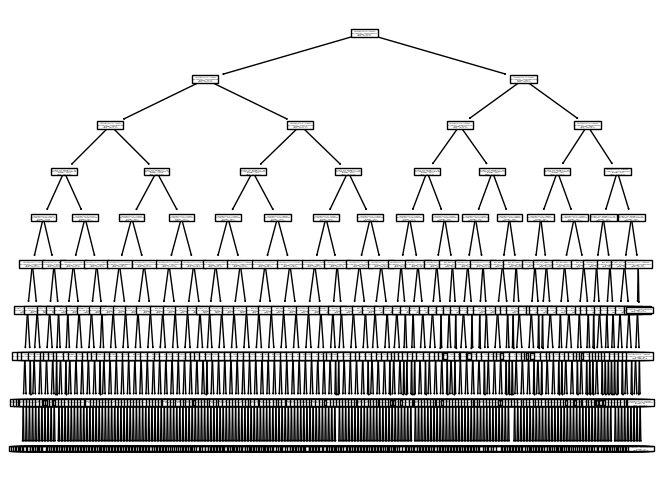

In [30]:
plt.figure(figsize=(8, 6))
tree.plot_tree(regTree, feature_names=train_X.columns)
plt.show()

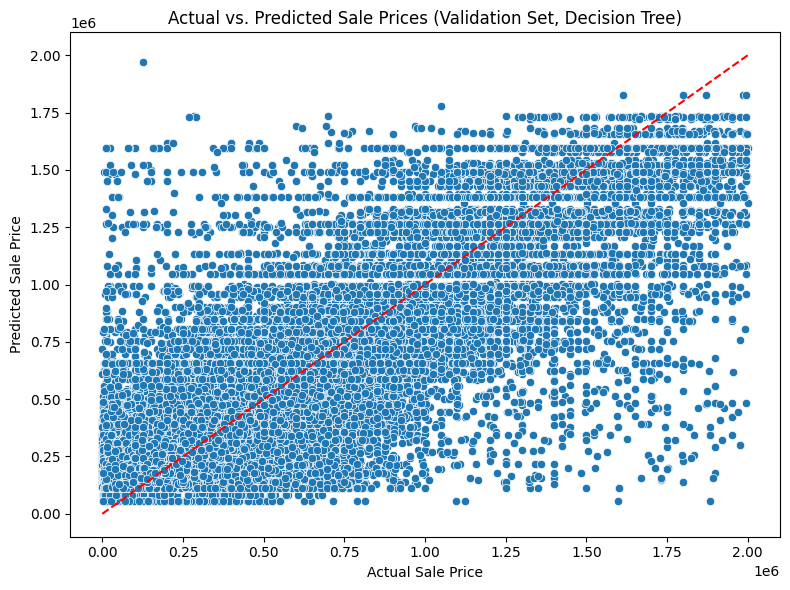

In [31]:
y_pred_tree_valid = regTree.predict(valid_X)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=valid_y, y=y_pred_tree_valid)
plt.plot([valid_y.min(), valid_y.max()], [valid_y.min(), valid_y.max()], 'r--')

plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Prices (Validation Set, Decision Tree)")
plt.tight_layout()
plt.show()